In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy=True

In [44]:
df = pd.read_csv('2016.csv')
df.head()


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


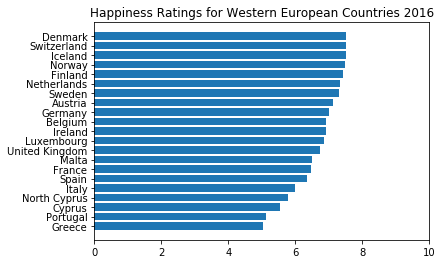

In [43]:
nam = df[df['Region']=="Western Europe"].sort_values(by=['Happiness Score'], ascending=True)

plt.barh(nam['Country'], nam['Happiness Score'])
plt.title('Happiness Ratings for Western European Countries 2016')
plt.xlim(0,10)
plt.show()

'''This chart shows the reported Happiness levels
for Western European countries (where 10 = happiest and 1 = least happy). Denmark is
the happiest country in this region, and Portugal and Greece are the least happy.'''

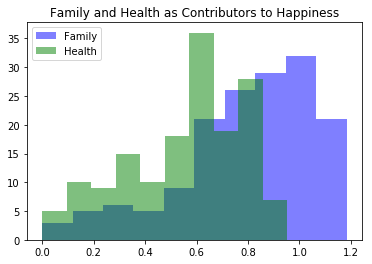

In [65]:
df['Family'].hist(alpha=.5, color="blue", label='Family')
df['Health (Life Expectancy)'].hist(alpha=.5, color="green", label='Health')
plt.grid()
plt.title('Family and Health as Contributors to Happiness')
plt.legend()
plt.show()
#The histogram peak of Family is clearly greater than the peak for health, 
#suggesting that Family contributes more to happiness than health.

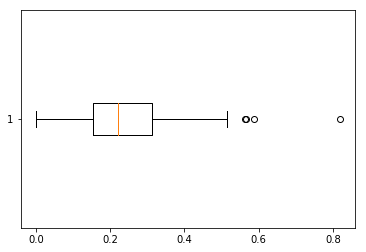

In [67]:
plt.boxplot(df['Generosity'], vert=False)
plt.show()

In [76]:
#The above chart shows that there is one country where Generosity contributes to 
#Happiness significantly more to Happiness than other countries. We find out
#which country it is below:
gen = df.loc[lambda x: df['Generosity'] > .7]
print(gen['Country'])


118    Myanmar
Name: Country, dtype: object


In [78]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [91]:
print(df.mean())


Country                            (0.01042395229015376+0.0021606208307494365j)
Region                           (0.0026273643864621185+0.0028607361643184595j)
Happiness Rank                                           (78.98089171974523+0j)
Happiness Score                                          (5.382184713375796+0j)
Lower Confidence Interval                                (5.282394904458598+0j)
Upper Confidence Interval                                (5.481974522292995+0j)
Economy (GDP per Capita)                                (0.9538798089171973+0j)
Family                                                  (0.7936210828025482+0j)
Health (Life Expectancy)                                (0.5576189808917195+0j)
Freedom                                                 (0.3709938853503184+0j)
Trust (Government Corruption)                           (0.1376237579617835+0j)
Generosity                                             (0.24263490445859878+0j)
Dystopia Residual                       

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


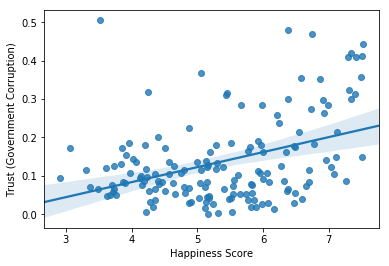

In [87]:
'''Based on the above table of means, Trust in government is one of the least
contributors to happiness, which made me wonder if it's even affecting the overall
score in a meaningful way, so I've done a regression of Trust and Overall Happiness below.
The slightly positive trendline shows there is a mild correlation.
'''

sns.regplot(df['Happiness Score'], df['Trust (Government Corruption)'])
plt.show()